<a href="https://colab.research.google.com/github/EricCallaway/COSC_6315_Programming_Assignment-1/blob/main/LogisticRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Import Libraries

In [1]:
from sklearn.datasets import make_classification
from matplotlib import pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import pandas as pd

Add Dataset

In [2]:

path = '/content/bdiag(1).csv'
df = pd.read_csv(path)
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


Define X and Y

In [8]:
x_cols = ['texture_mean','radius_mean']
x1 = df['texture_mean'].values
x2 = df['radius_mean'].values
x_train = df[x_cols].values

y_cols = ['diagnosis']
y_train = df[y_cols].values

# print(x_train)
# print(y_train)
print(df.columns)

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')


Visualize Data

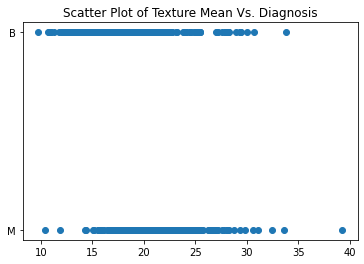

In [13]:
plt.scatter(df['texture_mean'], df['diagnosis'])
plt.title('Scatter Plot of Texture Mean Vs. Diagnosis')
plt.show()

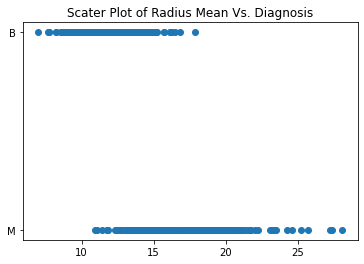

In [17]:
plt.scatter(df['radius_mean'], df['diagnosis'])
plt.title('Scater Plot of Radius Mean Vs. Diagnosis')
plt.show()

Perfrom Logistic Regression

In [22]:
log_reg = LogisticRegression()
log_reg.fit(x_train, y_train.ravel())
print(log_reg.coef_)
print(log_reg.intercept_)

[[0.21688595 1.0462619 ]]
[-19.67135103]


Make Prediction with Model

In [ ]:
y_pred = log_reg.predict(x_train)
print(y_pred)

# 1 for Malignant, 2 for Benign
for i in range(len(y_pred)):
  if y_pred[i] == 'M':
    y_pred[i] = '1'
  else:
    y_pred[i] = '2'
  
print(y_pred)

Display Confusion Matrix

In [42]:
cm = confusion_matrix(y_train, y_pred)
print(cm)

[[  0   0   0   0]
 [  0   0   0   0]
 [ 23 334   0   0]
 [173  39   0   0]]


Display Accuracy

In [49]:

true_pos = cm[[2],[0]]
false_pos = cm[[2],[1]]
false_neg = cm[[3],[0]]
true_neg = cm[[3],[1]]
accuracy = (true_pos + true_neg) / (true_pos + true_neg + false_pos + false_neg)
print(accuracy)

[62]
[334]
[173]
[39]
[0.10896309]


AUROC and ROC Curves

In [53]:
from sklearn.metrics import roc_curve, roc_auc_score
r_probs = [0 for _ in range(len(y_train))]
lg_probs = log_reg.predict_proba(x_train)
lg_probs = lg_probs[:,1]
r_auc = roc_auc_score(y_train, r_probs)
lg_auc = roc_auc_score(y_train, lg_probs)

print('Random Chance Prediction: AUROC = %.3f' % (r_auc))
print('Logistic Regression Model Prediction: AUROC = %.3f' % (lg_auc))

Random Chance Prediction: AUROC = 0.500
Logistic Regression Model Prediction: AUROC = 0.952


Calculate ROC Curve

In [62]:
y_train_roc = []
for i in range(len(y_train)):
  if y_train[i] == 'M':
    y_train_roc.append(1)
  else:
    y_train_roc.append(0)
r_fpr, r_tpr, _ = roc_curve(y_train_roc, r_probs)
lg_fpr, lg_tpr, _ = roc_curve(y_train_roc, lg_probs)


Plot ROC curve

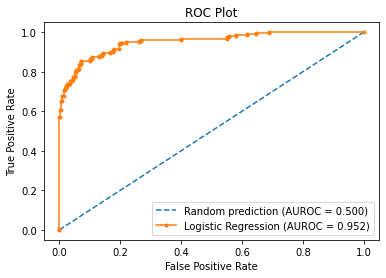

In [64]:
import matplotlib.pyplot as plt

plt.plot(r_fpr, r_tpr, linestyle='--', label='Random prediction (AUROC = %0.3f)' % r_auc)
plt.plot(lg_fpr, lg_tpr, marker='.', label='Logistic Regression (AUROC = %0.3f)' % lg_auc)

# Title
plt.title('ROC Plot')
# Axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# Show legend
plt.legend() # 
# Show plot
plt.show()